## Objective
In this lab, you will analyze a customer dataset to identify key factors influencing customer churn, create visualizations to explore the data, and build a predictive model using machine learning. The goal is to extract actionable insights and present your findings in a comprehensive report.
## Scenario
You are a data analyst at a fast-growing subscription-based service company. The company is concerned about customer churn—customers canceling their subscriptions—and has tasked you with analyzing customer data. Your objectives are to identify key factors that influence churn and build a predictive model to identify customers at risk of leaving.
## Materials Provided
- A dataset (`customer_churn.csv`) preloaded into a Pandas DataFrame named `df`.
- Python environment with essential libraries such as Pandas, Scikit-Learn, Matplotlib, and Seaborn pre-installed.

## High-Level Tasks
1. **Load and Explore the Data**
2. **Data Cleaning and Preprocessing**
3. **Exploratory Data Analysis (EDA) and Visualization**
4. **Machine Learning Model Building and Evaluation**
5. **Presenting Findings in a Comprehensive Report**

## Lab Instructions
### 1. Load and Explore the Data (5 minutes)
#### Step 1.1: Import the required Python library and load dataset.

In [1]:
import pandas as pd 
df = pd.read_csv("customer_churn.csv")

#### Step 1.2: Display the First 5 Rows
Use the provided code cell to display the first 5 rows of the dataset.

In [2]:
# Display the first 5 rows of the dataframe
df.head()

,Unnamed: 0,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,Yes,1,2.7,1,265.1,110,89.0,9.87,10.0
1,1,0,107,Yes,1,3.7,1,161.6,123,82.0,9.78,13.7
2,2,0,137,Yes,0,0.0,0,243.4,114,52.0,6.06,12.2
3,3,0,84,No,0,0.0,2,299.4,71,57.0,3.10,6.6
4,4,0,75,No,0,0.0,3,166.7,113,41.0,7.42,10.1


#### Step 1.3: Examine Column Names and Data Types
Inspect the column names and data types using `df.info()`.

In [3]:
# Display column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3333 non-null   int64  
 1   Churn            3333 non-null   int64  
 2   AccountWeeks     3333 non-null   int64  
 3   ContractRenewal  3333 non-null   object 
 4   DataPlan         3333 non-null   int64  
 5   DataUsage        3333 non-null   float64
 6   CustServCalls    3333 non-null   int64  
 7   DayMins          3333 non-null   float64
 8   DayCalls         3333 non-null   int64  
 9   MonthlyCharge    3333 non-null   float64
 10  OverageFee       3333 non-null   float64
 11  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6), object(1)
memory usage: 312.6+ KB


#### Step 1.4: Get Summary Statistics
Get summary statistics of numerical columns using `df.describe()`.

In [4]:
# Get summary statistics of numerical columns
df.describe()

,Unnamed: 0,Churn,AccountWeeks,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1666.00000,0.144914,101.064806,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,962.29855,0.352067,39.822106,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,833.00000,0.000000,74.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,1666.00000,0.000000,101.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,2499.00000,0.000000,127.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,3332.00000,1.000000,243.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


#### Step 1.5: Remove CSV Index Column
The index from the csv turned into a column and should be dropped. Use `df.drop` to get rid of the `Unnamed: 0` column. Then use `df.describe()` again to confirm the column is removed.

In [5]:
# Drop the “Unnamed: 0” column
# Drop the unwanted index column
df = df.drop(columns=['Unnamed: 0'])

# Use df.describe() to confirm the column was removed
df.describe()

,Churn,AccountWeeks,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


#### Step 1.6: Identify Potential Features and Target Variable
Select all features from the dataset, except churn (e.g., `“AccountWeeks”`, `“DataPlan”`, `“Data Usage”`, etc) and set the target variable (`'Churn'`).

In [6]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [7]:
# Select all features and set target variable
features = df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']]
target = df[['Churn']]

In [8]:
features.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,Yes,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,Yes,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,Yes,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,No,0,0.0,2,299.4,71,57.0,3.10,6.6
4,75,No,0,0.0,3,166.7,113,41.0,7.42,10.1


In [9]:
features["ContractRenewal"].value_counts()

Yes    3010
No      323
Name: ContractRenewal, dtype: int64

### 2. Data Cleaning and Preprocessing (5 minutes)
#### Step 2.1: Encode Categorical Features
Encode the categorical features (e.g., `ContractRenewal`) using one-hot encoding.

In [10]:
# One-hot encoding for 'ContractRenewal' feature
from sklearn.preprocessing import LabelEncoder

# Encode the 'ContractRenewal' column using Label Encoding (0 for No, 1 for Yes)
label_encoder = LabelEncoder()
features["ContractRenewal"] = label_encoder.fit_transform(features["ContractRenewal"])

features["ContractRenewal"].value_counts()

1    3010
0     323
Name: ContractRenewal, dtype: int64

## Standardize the features

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [12]:
X_scaled

array([[ 0.67648946,  0.32758048,  1.6170861 , ...,  1.99072703,
        -0.0715836 , -0.08500823],
       [ 0.14906505,  0.32758048,  1.6170861 , ...,  1.56451025,
        -0.10708191,  1.24048169],
       [ 0.9025285 ,  0.32758048, -0.61839626, ..., -0.26213309,
        -1.57434567,  0.70312091],
       ...,
       [-1.83505538,  0.32758048, -0.61839626, ..., -0.01858065,
         1.73094204,  1.3837779 ],
       [ 2.08295458, -3.05268496, -0.61839626, ..., -0.38390932,
        -0.81704825, -1.87621082],
       [-0.67974475,  0.32758048,  1.6170861 , ...,  2.66049626,
         1.28129669,  1.24048169]])

## Step 2.2: Split the Data
Split the data into training and testing sets (70% train, 30% test) using `train_test_split` from Scikit-Learn. 

Make sure to set the `random_state` parameter to 42 to ensure reproducibility and obtain the same results as the expected solution.

In [13]:
X = X_scaled
y = target

In [14]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train.shape, X_test.shape

((2333, 10), (1000, 10))

### 3. Exploratory Data Analysis (EDA) and Visualization (20 minutes)
#### Step 3.1: Summary Statistics for Relevant Features
Calculate and print summary statistics for relevant features (e.g., average tenure for churned vs. non-churned customers).

In [16]:
# Summary statistics for churned vs. non-churned customers
df.groupby("Churn")["AccountWeeks"].mean()

# Print average tenure
### YOUR CODE HERE ###

Churn
0    100.793684
1    102.664596
Name: AccountWeeks, dtype: float64

#### Step 3.2: Create Visualizations
Create visualizations (e.g., bar charts, histograms, box plots) to explore the relationships between features and the target variable (`'Churn'`).

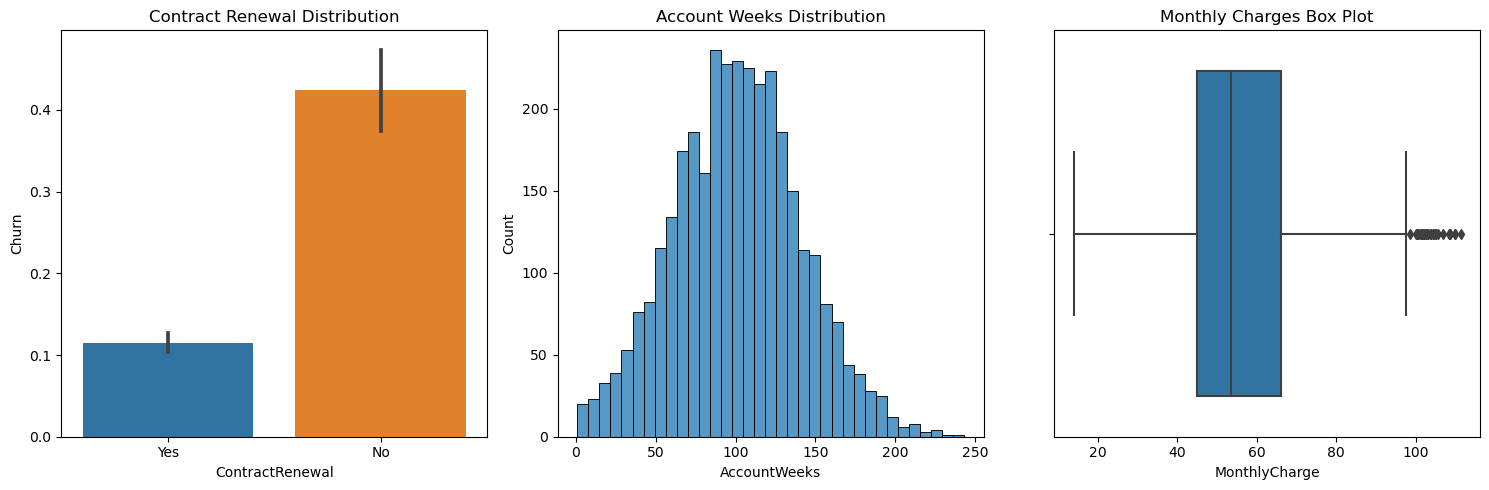

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15, 5))

# Bar chart for contract type vs churn
plt.subplot(1, 3, 1)  # (rows, cols, index)
sns.barplot(data=df, x="ContractRenewal", y="Churn")
plt.title("Contract Renewal Distribution")

# Histogram for tenure distribution
plt.subplot(1, 3, 2)
sns.histplot(data=df, x="AccountWeeks")
plt.title("Account Weeks Distribution")

# Box plot for monthly charges
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="MonthlyCharge")
plt.title("Monthly Charges Box Plot")

# Show all plots in one cell
plt.tight_layout()
plt.show()

#### Step 3.3: Interpret Visualizations
Interpret the visualizations and identify key insights about factors influencing churn.  Enter your observations in the cell below:

Enter your observations about the visualizations here:

- Observation 1: 
- Observation 2: 
- Observation 3: 

### 4. Machine Learning Model Building and Evaluation (20 minutes)
#### Step 4.1: Choose a Classification Algorithm
Choose a suitable classification algorithm (e.g., `LogisticRegression`) and import it.

In [18]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
model = LogisticRegression()

#### Step 4.2: Train the Model
Train the model on the training data.

In [19]:
# Train the model
model.fit(X_train,y_train)

LogisticRegression()

#### Step 4.3: Make Predictions
Use the trained model to make predictions on the testing data.

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Step 4.4: Evaluate the Model
Evaluate the model's performance using appropriate metrics (`accuracy_score`, `precision_score`, `recall_score`, `f1_score`).

**Note:** For grading purposes, calculate and store each of these metrics in the following variables:
- `accuracy`
- `precision`
- `recall`
- `f1`

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
# Round all values to 3 decimal places
# Calculate evaluation metrics
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)
f1 = round(f1_score(y_test, y_pred), 3)

#### Check Your Results:

In [22]:
# Print to check results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.867
Precision: 0.604
Recall: 0.203
F1 Score: 0.304


### 5. Presenting Findings in a Comprehensive Report
#### Step 5.1: Compile the Results
Compile your analysis, visualizations, and model evaluation results into a comprehensive report. Fill them in as directed below.
- `Introduction:` Write a sentence or two describing the purpose of this analysis.
- `Data Exploration:` Write a sentence or two highlighting the key factors in customer churn.
- `Model Building and Evaluation:` Write a sentence or two describing how your model was trained, and the accuracy, precision, and recall rates.
- `Key Insights:` Add two or three bullet points summarizing your findings.
- `Recommendations:` Add two or three bullet points with the recommendations you would make based on this analysis.

# Customer Churn Analysis Report

## Introduction
- 


## Data Exploration
- 


## Model Building and Evaluation
- 


## Key Insights
- 
- 
- 


## Recommendations
- 
- 

## Hints & Tips
- Use the "Pandas Cheat Sheet" for quick syntax reference on DataFrame operations.
- Check the "Scikit-Learn Documentation" for examples and explanations of classification models.
- Use Matplotlib for creating informative visualizations. Reference various materials in Course 2.

Good luck with your customer churn analysis!